In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import os

In [64]:
isp_data = pd.read_csv('../files/isp_data_2.csv')

In [65]:
# set NaN values to 'unknown'
isp_data['date'].fillna('unknown', inplace=True)

In [66]:
df = isp_data.copy()

# Filter out rows with "unknown" dates
df = df[df['date'] != 'unknown']

# Convert the 'date' column to strings
df['date'] = df['date'].astype(str)

# Define a function to clean and fix dates
def clean_and_fix_dates(date_str):
    try:
        # Check for NaN and convert to "unknown"
        if pd.isna(date_str):
            return "unknown"
        
        # Try to parse the date
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        # If it's an invalid date, set the month to 12 (December) and day to 31
        date_obj = datetime.strptime(date_str[:4] + '-12-31', '%Y-%m-%d')
    
    return date_obj.strftime('%Y-%m-%d')

# Apply the function to the 'date' column
df['date'] = df['date'].apply(clean_and_fix_dates)



In [67]:
df['date'] = df['date'].astype(str)
df = df[df['date'] != 'unknown']


# Define a function to fix invalid dates
def fix_invalid_months(date_str):
    try:
        # Try to parse the date
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        # If it's an invalid date, set the month to 12 (December) and keep the year and day intact
        parts = date_str.split('-')
        date_obj = datetime(int(parts[0]), 12, int(parts[2]))
    
    return date_obj.strftime('%Y-%m-%d')

# Define a function to fix invalid dates
def fix_invalid_dates(date_str):
    try:
        # Try to parse the date
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        # If it's an invalid date, set it to the 30th day of the same month
        date_obj = datetime.strptime(date_str[:8] + '30', '%Y-%m-%d')
    
    return date_obj.strftime('%Y-%m-%d')




In [68]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [69]:
monthly_payments = df.groupby(['ISP','year', 'month'])['amount'].sum().reset_index()

monthly_payments = pd.DataFrame(monthly_payments)

In [70]:
monthly_payments.sort_values(by=['amount'])

,ISP,year,month,amount
2,Dialog,2022,5,200.00
1,Dialog,2022,3,500.00
5,Dialog,2022,11,700.00
3,Dialog,2022,7,2228.56
0,Dialog,2021,12,2890.44
8,Dialog,2023,2,4000.00
6,Dialog,2022,12,4200.00
4,Dialog,2022,8,4587.28
7,Dialog,2023,1,7000.00
14,SLT,2023,4,7317.28


In [71]:
orig = df.copy()
df = monthly_payments.copy()

import plotly.graph_objs as go
import plotly.express as px

# Assuming you have the 'year' and 'month' columns
# If not, you can use df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str) to create a 'year-month' column

# Create a line graph using Plotly
fig = go.Figure()

# Add a line trace for each ISP
for isp in df['ISP'].unique():
    df_filtered = df[df['ISP'] == isp]
    fig.add_trace(go.Scatter(x=df_filtered['year'].astype(str) + '-' + df_filtered['month'].astype(str),
                             y=df_filtered['amount'],
                             mode='lines+markers',
                             name=isp))

# Customize the layout
fig.update_layout(
    title='Monthly Expenditure on Internet Services by ISP (Line Graph)',
    xaxis_title='Year-Month',
    yaxis_title='Amount',
    xaxis=dict(tickangle=45),
    template="plotly_dark",
    width=800,
    height=500
)
# fig.update_traces(line=dict(color=['crimson', 'teal']))

# Show the plot
fig.show()


In [72]:
import plotly.express as px

# Create a pie chart using Plotly Express
fig = px.pie(df, names='ISP', values='amount', title='Total Expenditure by ISP')

# Show the plot
fig.show()

In [73]:
# Create a new column 'year-month' for x-axis labeling
df['year-month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)
df

,ISP,year,month,amount,year-month
0,Dialog,2021,12,2890.44,2021-12
1,Dialog,2022,3,500.00,2022-03
2,Dialog,2022,5,200.00,2022-05
3,Dialog,2022,7,2228.56,2022-07
4,Dialog,2022,8,4587.28,2022-08
5,Dialog,2022,11,700.00,2022-11
6,Dialog,2022,12,4200.00,2022-12
7,Dialog,2023,1,7000.00,2023-01
8,Dialog,2023,2,4000.00,2023-02
9,SLT,2022,10,8920.42,2022-10


In [81]:
df['date'] = df['year'].astype(str) + '-' + df['month'].apply(lambda x: calendar.month_name[x])


In [82]:
df

,ISP,year,month,amount,year-month,date
0,Dialog,2021,12,2890.44,2021-12,2021-December
1,Dialog,2022,3,500.00,2022-03,2022-March
2,Dialog,2022,5,200.00,2022-05,2022-May
3,Dialog,2022,7,2228.56,2022-07,2022-July
4,Dialog,2022,8,4587.28,2022-08,2022-August
5,Dialog,2022,11,700.00,2022-11,2022-November
6,Dialog,2022,12,4200.00,2022-12,2022-December
7,Dialog,2023,1,7000.00,2023-01,2023-January
8,Dialog,2023,2,4000.00,2023-02,2023-February
9,SLT,2022,10,8920.42,2022-10,2022-October


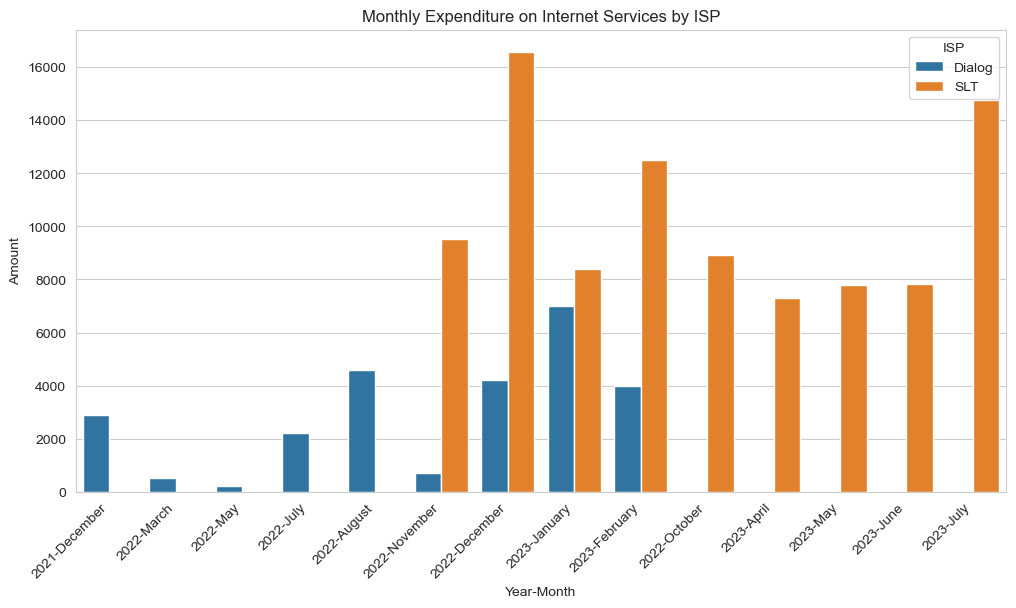

In [74]:
import calendar
# Create a custom date column in the format 'YYYY-Month'
df['date'] = df['year'].astype(str) + '-' + df['month'].apply(lambda x: calendar.month_name[x])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=df, x="date", y="amount", hue="ISP")

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set plot labels and title
plt.xlabel("Year-Month")
plt.ylabel("Amount")
plt.title("Monthly Expenditure on Internet Services by ISP")

# Show the plot
plt.show()

In [75]:
import plotly.express as px


# Create a bar plot using Plotly Express
trace1 = px.bar(df, x="date", y="amount", color="ISP",
             labels={"date": "Year-Month", "amount": "Amount"},
             title="Monthly Expenditure on Internet Services by ISP")

# Rotate X-axis labels for better readability
trace1.update_xaxes(tickangle=45)

# Change the size of the figure
trace1.update_layout(width=800, height=500)

# Change the theme (color scheme)
trace1.update_layout(template="plotly_dark")

# Show the plot
fig.show()


In [76]:
import plotly.graph_objs as go
import plotly.express as px

# Assuming you have the 'date' column in the 'YYYY-Month' format
# If not, you can create it using the code you provided earlier

# Create a line graph using Plotly
fig = go.Figure()

# Add a line trace for each ISP
for isp in df['ISP'].unique():
    df_filtered = df[df['ISP'] == isp]
    fig.add_trace(go.Scatter(x=df_filtered['date'], y=df_filtered['amount'], mode='lines+markers', name=isp))

# Customize the layout
fig.update_layout(
    title='Monthly Expenditure on Internet Services by ISP (Line Graph)',
    xaxis_title='Year-Month',
    yaxis_title='Amount',
    xaxis=dict(tickangle=45),
    template="plotly_dark",
    width=800,
    height=500
)

# Show the plot
fig.show()


In [79]:
df

,ISP,year,month,amount,year-month,date
0,Dialog,2021,12,2890.44,2021-12,2021-December
1,Dialog,2022,3,500.00,2022-03,2022-March
2,Dialog,2022,5,200.00,2022-05,2022-May
3,Dialog,2022,7,2228.56,2022-07,2022-July
4,Dialog,2022,8,4587.28,2022-08,2022-August
5,Dialog,2022,11,700.00,2022-11,2022-November
6,Dialog,2022,12,4200.00,2022-12,2022-December
7,Dialog,2023,1,7000.00,2023-01,2023-January
8,Dialog,2023,2,4000.00,2023-02,2023-February
9,SLT,2022,10,8920.42,2022-10,2022-October


In [80]:
df

,ISP,year,month,amount,year-month,date
0,Dialog,2021,12,2890.44,2021-12,2021-December
1,Dialog,2022,3,500.00,2022-03,2022-March
2,Dialog,2022,5,200.00,2022-05,2022-May
3,Dialog,2022,7,2228.56,2022-07,2022-July
4,Dialog,2022,8,4587.28,2022-08,2022-August
5,Dialog,2022,11,700.00,2022-11,2022-November
6,Dialog,2022,12,4200.00,2022-12,2022-December
7,Dialog,2023,1,7000.00,2023-01,2023-January
8,Dialog,2023,2,4000.00,2023-02,2023-February
9,SLT,2022,10,8920.42,2022-10,2022-October


In [86]:
import plotly.express as px


# Define custom colors for ISPs
colors = {'Dialog': 'red', 'SLT': 'blue'}

# Create a bar plot using Plotly Express with custom colors
trace1 = px.bar(df, x="year-month", y="amount",
                color="ISP",
                color_discrete_map=colors,  # Custom colors for ISPs
                labels={"year-month": "Year-Month", "amount": "Amount"},
                title="Monthly Expenditure on Internet Services by ISP")


# Rotate X-axis labels for better readability
trace1.update_xaxes(tickangle=45)

# Change the size of the figure
trace1.update_layout(width=800, height=500)

# Change the theme (color scheme)
trace1.update_layout(template="plotly_dark")